# Exercise 07

In [26]:
# Imports
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

In [27]:
# Load dataset
mushroom = pd.read_csv('data/agaricus-lepiota.csv')
mushroom.pop('edibility')  # Drop the target variable
dummies = pd.get_dummies(mushroom)  # Convert categorical variables to dummy variables

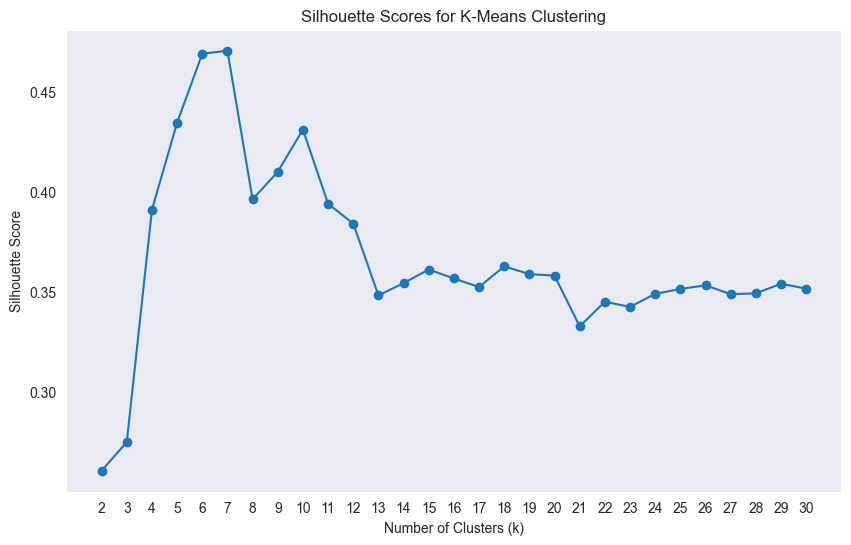

The optimal number of clusters is: 7


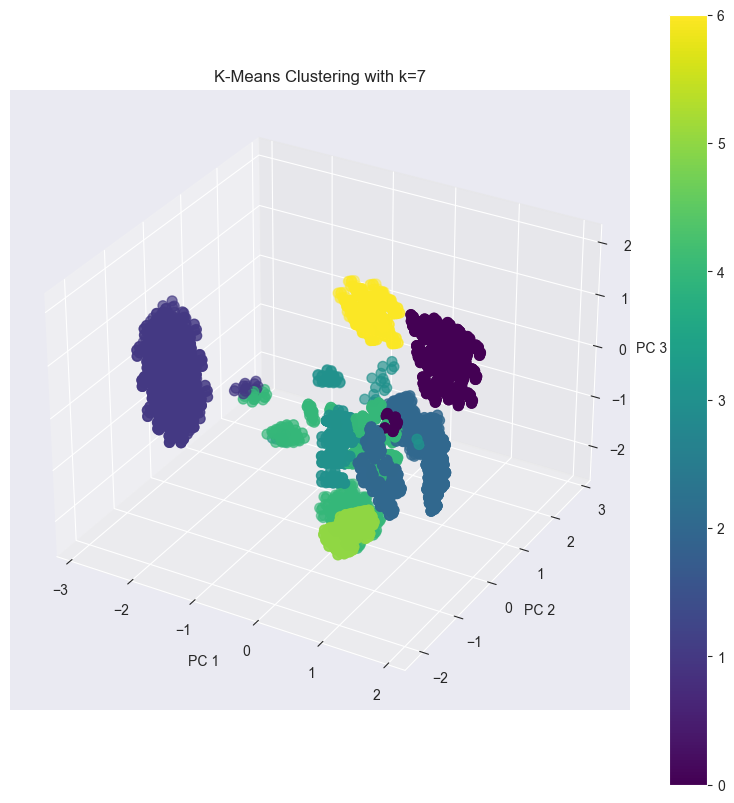

In [24]:
# Normalize the data
scaler = MinMaxScaler()
dummies_scaled = scaler.fit_transform(dummies)

# PCA for dimensionality reduction
pca = PCA(n_components=10)  # Reduce to 10 components
df_pca = pca.fit_transform(dummies_scaled)

# Evaluate the optimal number of clusters using silhouette score
silhouette_scores = []
k_values = range(2, 31)  # Testing cluster counts from 2 to 30

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df_pca)
    silhouette_scores.append(metrics.silhouette_score(df_pca, labels))

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid()
plt.show()

# Find the optimal number of clusters
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters is: {optimal_k}")

# Fit K-Means with the optimal number of clusters
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
labels_optimal = kmeans_optimal.fit_predict(df_pca)

# Visualize clusters using PCA
pca_3d = PCA(n_components=3)  # Further reduce to 3 components for visualization
x_plot = pca_3d.fit_transform(dummies_scaled)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x_plot[:, 0], x_plot[:, 1], x_plot[:, 2], c=labels_optimal, s=50, cmap='viridis')
ax.set_title(f"K-Means Clustering with k={optimal_k}")
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_zlabel('PC 3')
plt.colorbar(scatter)
plt.show()